In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")

[![Logo Optimus](images/logoOptimus.png)](https://hioptimus.com)  

[![PyPI version](https://badge.fury.io/py/optimuspyspark.svg)](https://badge.fury.io/py/optimuspyspark) [![Build Status](https://travis-ci.org/ironmussa/Optimus.svg?branch=master)](https://travis-ci.org/ironmussa/Optimus) [![Documentation Status](https://readthedocs.org/projects/optimus-ironmussa/badge/?version=latest)](http://optimus-ironmussa.readthedocs.io/en/latest/?badge=latest)  [![built_by iron](https://img.shields.io/badge/built_by-iron-FF69A4.svg)](http://ironmussa.com) [![Updates](https://pyup.io/repos/github/ironmussa/Optimus/shield.svg)](https://pyup.io/repos/github/ironmussa/Optimus/)  [![GitHub release](https://img.shields.io/github/release/ironmussa/optimus.svg)](https://github.com/ironmussa/Optimus/) [![Codacy Badge](https://api.codacy.com/project/badge/Grade/e01572e2af5640fcbcdd58e7408f3ea0)](https://www.codacy.com/app/favio.vazquezp/Optimus?utm_source=github.com&utm_medium=referral&utm_content=ironmussa/Optimus&utm_campaign=badger) [![StackShare](https://img.shields.io/badge/tech-stack-0690fa.svg?style=flat)](https://stackshare.io/iron-mussa/devops)  [![Platforms](https://img.shields.io/badge/platform-Linux%20%7C%20Mac%20OS%20%7C%20Windows-blue.svg)](https://spark.apache.org/docs/2.2.0/#downloading) [![Code Health](https://landscape.io/github/ironmussa/Optimus/develop/landscape.svg?style=flat)](https://landscape.io/github/ironmussa/Optimus/develop) [![Coverage Status](https://coveralls.io/repos/github/ironmussa/Optimus/badge.svg?branch=master)](https://coveralls.io/github/ironmussa/Optimus?branch=master) [![Mentioned in Awesome Data Science](https://awesome.re/mentioned-badge.svg)](https://github.com/bulutyazilim/awesome-datascience)  [![Join the chat at https://gitter.im/optimuspyspark/Lobby](https://badges.gitter.im/optimuspyspark/Lobby.svg)](https://gitter.im/optimuspyspark/Lobby?utm_source=badge&utm_medium=badge&utm_campaign=pr-badge&utm_content=badge)  [![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/ironmussa/Optimus/master)

Optimus is the missing framework to profile, clean, process and do ML in a distributed fashion using Apache Spark(PySpark).

## Installation (pip):  
  
In your terminal just type  `pip install optimuspyspark`

### Requirements
* Apache Spark>= 2.4.0  
* Python>=3.6  

## Examples 

You can go to the 10 minutes to Optimus [notebook](https://github.com/ironmussa/Optimus/blob/master/examples/10_min_from_spark_to_pandas_with_optimus.ipynb) where you can find the basic to start working. 

Also you can go to the [examples](examples/) folder to found specific notebooks about data cleaning, data munging, profiling, data enrichment and how to create ML and DL models.

Besides check the [Cheat Sheet](https://htmlpreview.github.io/?https://github.com/ironmussa/Optimus/blob/master/docs/cheatsheet/optimus_cheat_sheet.html) 

## Documentation
  
[![Documentation](https://media.readthedocs.com/corporate/img/header-logo.png)](http://docs.hioptimus.com/en/latest/)  
  
## Feedback 
Feedback is what drive Optimus future, so please take a couple of minutes to help shape the Optimus' Roadmap:  https://optimusdata.typeform.com/to/aEnYRY  

Also if you want to a suggestion or feature request use https://github.com/ironmussa/optimus/issues
 
## Start Optimus

In [2]:
from optimus import Optimus
op= Optimus()

You also can use an already created Spark session:

In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('abc').getOrCreate()
op= Optimus(spark)

## Loading data
Now Optimus can load data in csv, json, parquet, avro, excel from a local file or URL.

In [4]:
#csv
df = op.load.csv("examples/data/foo.csv")

#json
df = op.load.json("examples/data/foo.json")

# parquet
df = op.load.parquet("examples/data/foo.parquet")

# avro
# df = op.load.avro("examples/data/foo.avro").table(5)

# excel 
df = op.load.excel("examples/data/titanic3.xls")

If you want to load from a URL you just need to use load.url() with the path and the type file (csv, json, parquet, avro and excel). Optimus will try to infer the file format from the file extension

In [5]:
df = op.load.url("https://raw.githubusercontent.com/ironmussa/Optimus/master/examples/data/foo.json")

With .table() you hace a beautifull way to show your data. You have extra informacion like column number, column data type and marked white spaces 


![](images/table.png)

## Cleaning and Processing
  
Optimus V2 was created to make data cleaning a breeze. The API was designed to be super easy to newcomers and very familiar for people that comes from Pandas.
Optimus expand the Spark DataFrame functionality adding .rows and .cols attributes.

For example you can load data from a url, transform and apply some predefined cleaning functions:

In [6]:
# This is a custom function
def func(value, arg):
    return "this was a number"
    
new_df = df\
    .rows.sort("product","desc")\
    .withColumn('id1', df.id)\
    .cols.lower(["firstName","lastName"])\
    .cols.date_transform("birth", "yyyy/MM/dd", "dd-MM-YYYY")\
    .cols.years_between("birth", "yyyy/MM/dd")\
    .cols.remove_accents("lastName")\
    .cols.remove_special_chars("lastName")\
    .cols.replace("product","taaaccoo","taco")\
    .cols.replace("product",["piza","pizzza"],"pizza")\
    .rows.drop(df["id"]<7)\
    .cols.drop("dummyCol")\
    .cols.rename(str.lower)\
    .cols.apply_by_dtypes("product",func,"string", data_type="integer")\
    .cols.trim("*")

You can change the table output back to ascii if you which

In [7]:
op.output("ascii")

You transform this:

In [8]:
df.table()

+---------+----------+--------+--------------------+---+--------------------+-----+----------+
|billingId|     birth|dummyCol|           firstName| id|            lastName|price|   product|
+---------+----------+--------+--------------------+---+--------------------+-----+----------+
|      123|1980/07/07|   never|                Luis|  1|         Alvarez$$%!|   10|      Cake|
|      423|1950/07/08|   gonna|               André|  2|              Ampère|    8|      piza|
|      551|1990/07/09|    give|               NiELS|  3|          Böhr//((%%|    8|     pizza|
|      521|1954/07/10|     you|                PAUL|  4|              dirac$|    8|     pizza|
|      634|1990/07/11|      up|              Albert|  5|            Einstein|    8|     pizza|
|      672|1930/08/12|   never|             Galileo|  6|             GALiLEI|    5|     arepa|
|      323|1970/07/13|   gonna|                CaRL|  7|            Ga%%%uss|    3|      taco|
|      624|1950/07/14|     let|               Davi

Into this

In [9]:
new_df.table()

+---------+----------+--------------------+---+--------+-----+-----------------+---+--------------------+-------------------+
|billingid|     birth|           firstname| id|lastname|price|          product|id1|birth_data_transform|birth_years_between|
+---------+----------+--------------------+---+--------+-----+-----------------+---+--------------------+-------------------+
|      735|1920/04/22|            johannes|  9|  kepler|    3|             taco|  9|          22-04-1920|            99.0188|
|      323|1970/07/13|                carl|  7|   gauss|    3|             taco|  7|          13-07-1970|             48.793|
|      875|1923/03/12|               james| 10| maxwell|    3|             taco| 10|          12-03-1923|             96.129|
|      624|1950/07/14|               david|  8| hilbert|    3|             taco|  8|          14-07-1950|            68.7903|
|      553|1997/06/27|                fred| 14|   hoyle|    8|            pizza| 14|          27-06-1997|            2

Note that you can use Optimus functions and Spark functions(`.WithColumn()`) and all the df function availables in a Spark Dataframe at the same time. To know about all the Optimus functionality please go to this [notebooks](examples/)

### Custom functions
Spark have multiple ways to transform your data like rdd, Column Expression ,udf and pandas udf. In Optimus we create the `apply()` and `apply_expr` which handle all the implementation complexity.

Here you apply a function to the "billingid" column. Sum 1 and 2 to the current column value. All powered by Pandas UDF

In [10]:
def func(value, args):
    return value + args[0] + args[1]

df.cols.apply("billingid",func,"int", [1,2]).table()

+---------+----------+--------+--------------------+---+--------------------+-----+----------+
|billingid|     birth|dummyCol|           firstName| id|            lastName|price|   product|
+---------+----------+--------+--------------------+---+--------------------+-----+----------+
|      126|1980/07/07|   never|                Luis|  1|         Alvarez$$%!|   10|      Cake|
|      426|1950/07/08|   gonna|               André|  2|              Ampère|    8|      piza|
|      554|1990/07/09|    give|               NiELS|  3|          Böhr//((%%|    8|     pizza|
|      524|1954/07/10|     you|                PAUL|  4|              dirac$|    8|     pizza|
|      637|1990/07/11|      up|              Albert|  5|            Einstein|    8|     pizza|
|      675|1930/08/12|   never|             Galileo|  6|             GALiLEI|    5|     arepa|
|      326|1970/07/13|   gonna|                CaRL|  7|            Ga%%%uss|    3|      taco|
|      627|1950/07/14|     let|               Davi

If you want to apply a Column Expression use `apply_expr()` like this. In this case we pasa an argument 10 to divide the actual column value

In [11]:
from pyspark.sql import functions as F

def func(col_name, args):
    return F.col(col_name)/20

df.cols.apply_expr("billingid", func, 20).table()

+---------+----------+--------+--------------------+---+--------------------+-----+----------+
|billingid|     birth|dummyCol|           firstName| id|            lastName|price|   product|
+---------+----------+--------+--------------------+---+--------------------+-----+----------+
|     6.15|1980/07/07|   never|                Luis|  1|         Alvarez$$%!|   10|      Cake|
|    21.15|1950/07/08|   gonna|               André|  2|              Ampère|    8|      piza|
|    27.55|1990/07/09|    give|               NiELS|  3|          Böhr//((%%|    8|     pizza|
|    26.05|1954/07/10|     you|                PAUL|  4|              dirac$|    8|     pizza|
|     31.7|1990/07/11|      up|              Albert|  5|            Einstein|    8|     pizza|
|     33.6|1930/08/12|   never|             Galileo|  6|             GALiLEI|    5|     arepa|
|    16.15|1970/07/13|   gonna|                CaRL|  7|            Ga%%%uss|    3|      taco|
|     31.2|1950/07/14|     let|               Davi

## Data profiling

Optimus comes with a powerful and unique data profiler. Besides basic and advance stats like min, max, kurtosis, mad etc, 
it also let you know what type of data has every column. For example if a string column have string, integer, float, bool, date Optimus can give you an unique overview about your data. 
Just run `df.profile("*")` to profile all the columns. For more info about the profiler please go to this [notebook](examples/new-api-profiler.ipynb).

Let's load a "big" dataset

In [12]:
df = op.load.url("https://raw.githubusercontent.com/ironmussa/Optimus/master/examples/data/Meteorite_Landings.csv").h_repartition()

Including 'nan' as Null in processing 'name'
Including 'nan' as Null in processing 'name'
Including 'nan' as Null in processing 'nametype'
Including 'nan' as Null in processing 'recclass'
Including 'nan' as Null in processing 'fall'
Including 'nan' as Null in processing 'year'
Including 'nan' as Null in processing 'GeoLocation'


Number of columns,10
Number of rows,45716
Total Missing (%),0.49%
Total size in memory,37.9 MB
String,1
Numeric,0
Date,0
Bool,0
Array,0
Not available,0
Unique,45515

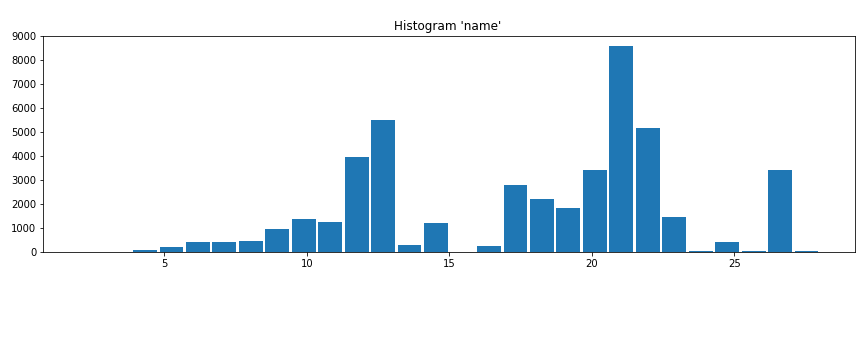
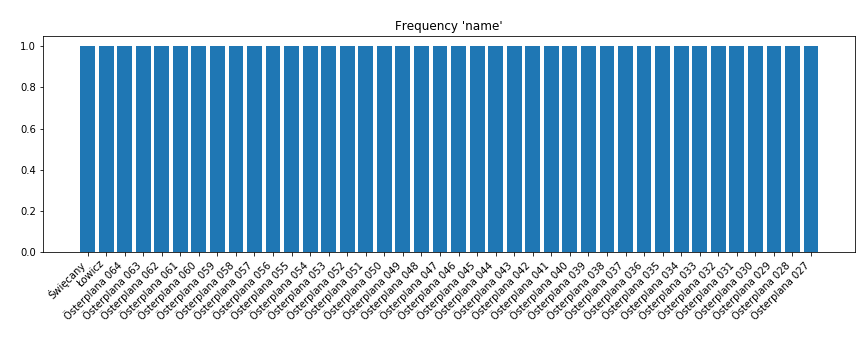

In [13]:
op.profiler.run(df, "name", infer=False)

For dates data types Optimus can give you extra data

Including 'nan' as Null in processing 'name'
Including 'nan' as Null in processing 'nametype'
Including 'nan' as Null in processing 'recclass'
Including 'nan' as Null in processing 'fall'
Including 'nan' as Null in processing 'year'
Including 'nan' as Null in processing 'GeoLocation'


Number of columns,10
Number of rows,45716
Total Missing (%),0.49%
Total size in memory,47.6 MB
String,0
Numeric,0
Date,1
Bool,0
Array,0
Not available,0
Unique,265

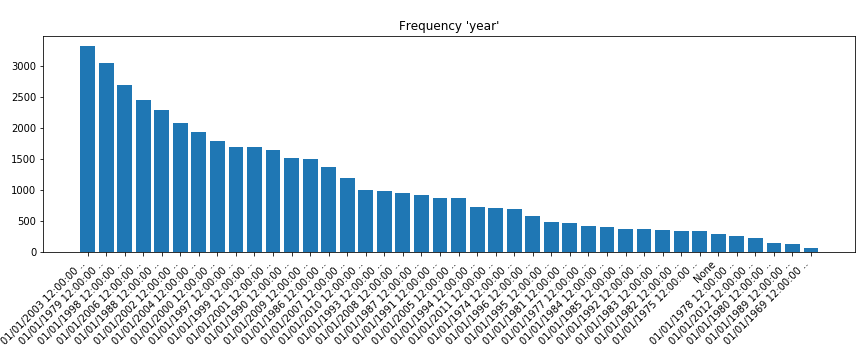
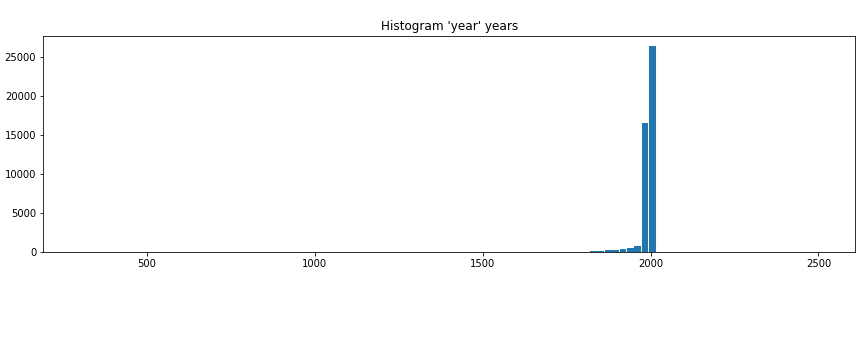
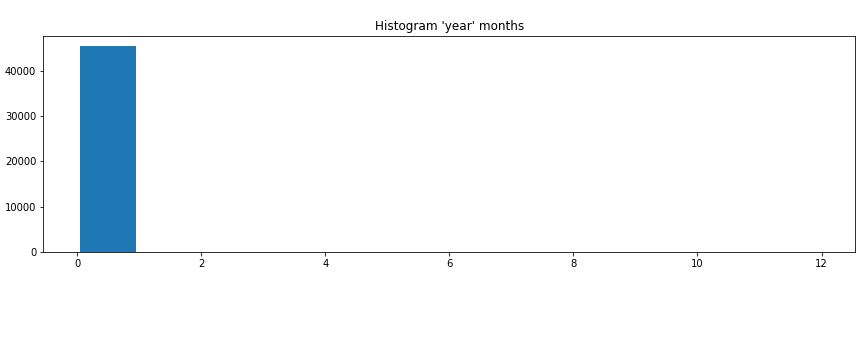
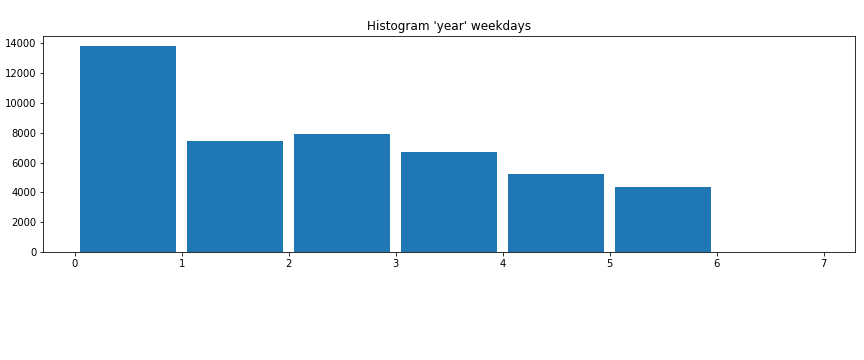
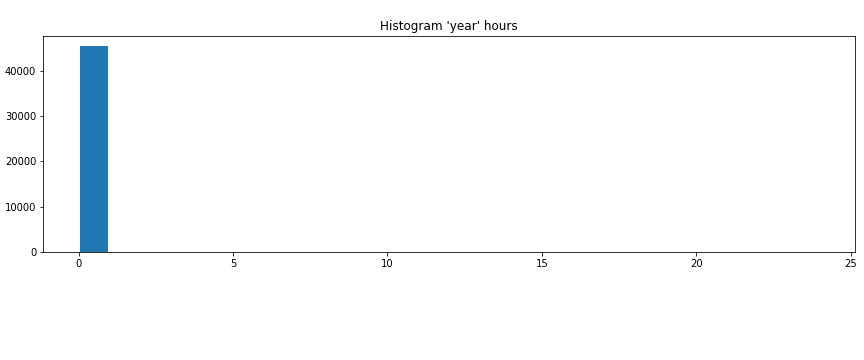
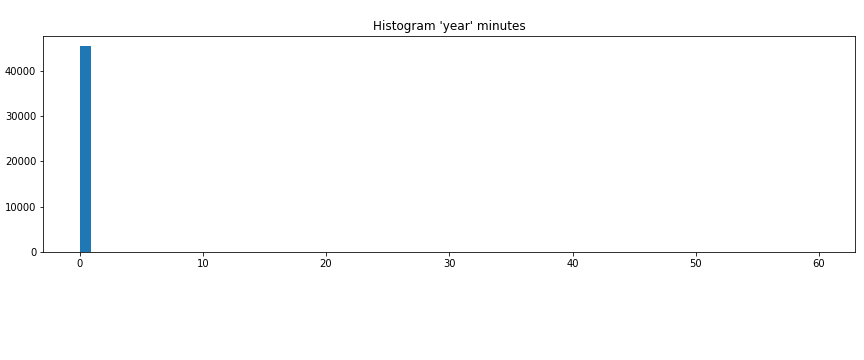

In [14]:
op.profiler.run(df, "year", infer=True)

## Plots
Besides histograms, frequency plots you also have scatter plots and box plots. All powered by Apache by pyspark

In [15]:
df = op.load.excel("examples/data/titanic3.xls")
df = df.rows.drop_na(["age","fare"])

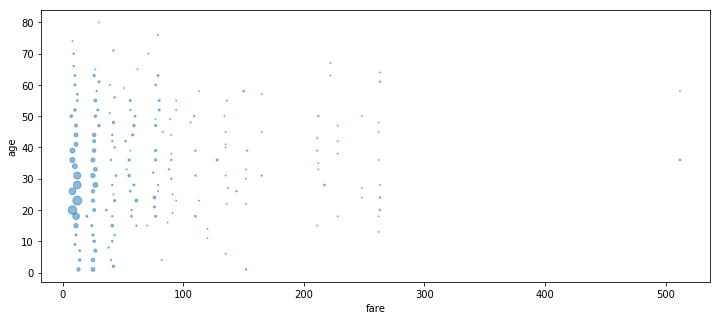

In [16]:
df.plot.scatter(["fare", "age"], buckets=30)

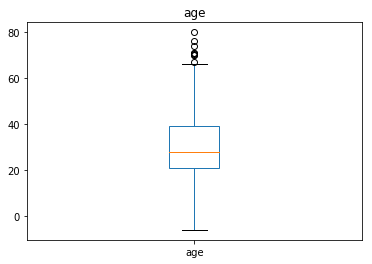

<Figure size 864x360 with 0 Axes>

In [17]:
df.plot.box("age")

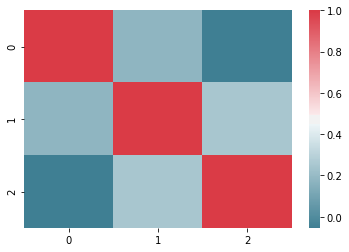

In [18]:
df.plot.correlation(["age","fare","survived"])

## Outliers

### Get the ouliers using iqr

In [19]:
df.outliers.iqr("age").select().table(5)

+------+--------+--------------------+------+----+-----+-----+----------+--------+-------+--------+----+-----+--------------------+
|pclass|survived|                name|   sex| age|sibsp|parch|    ticket|    fare|  cabin|embarked|boat| body|           home_dest|
+------+--------+--------------------+------+----+-----+-----+----------+--------+-------+--------+----+-----+--------------------+
|     1|       0|Artagaveytia, Mr....|  male|71.0|    0|    0|  PC 17609| 49.5042|    nan|       C| nan| 22.0| Montevideo, Uruguay|
|     1|       1|Barkworth, Mr. Al...|  male|80.0|    0|    0|     27042|    30.0|    A23|       S|   B|  NaN|       Hessle, Yorks|
|     1|       1|Cavendish, Mrs. T...|female|76.0|    1|    0|     19877|   78.85|    C46|       S|   6|  NaN|Little Onn Hall, ...|
|     1|       0|Crosby, Capt. Edw...|  male|70.0|    1|    1| WE/P 5735|    71.0|    B22|       S| nan|269.0|       Milwaukee, WI|
|     1|       0|Goldschmidt, Mr. ...|  male|71.0|    0|    0|  PC 17754| 34

### Remove the outliers using iqr

In [20]:
df.outliers.iqr("age").drop().table(5)

+------+--------+--------------------+------+------+-----+-----+--------+--------+-------+--------+----+-----+--------------------+
|pclass|survived|                name|   sex|   age|sibsp|parch|  ticket|    fare|  cabin|embarked|boat| body|           home_dest|
+------+--------+--------------------+------+------+-----+-----+--------+--------+-------+--------+----+-----+--------------------+
|     1|       1|Allen, Miss. Elis...|female|  29.0|    0|    0|   24160|211.3375|     B5|       S|   2|  NaN|        St Louis, MO|
|     1|       1|Allison, Master. ...|  male|0.9167|    1|    2|  113781|  151.55|C22 C26|       S|  11|  NaN|Montreal, PQ / Ch...|
|     1|       0|Allison, Miss. He...|female|   2.0|    1|    2|  113781|  151.55|C22 C26|       S| nan|  NaN|Montreal, PQ / Ch...|
|     1|       0|Allison, Mr. Huds...|  male|  30.0|    1|    2|  113781|  151.55|C22 C26|       S| nan|135.0|Montreal, PQ / Ch...|
|     1|       0|Allison, Mrs. Hud...|female|  25.0|    1|    2|  113781|  1

### You can also use z_score, modified_z_score or mad



```
df.outliers.z_score("age", threshold=2).drop()
df.outliers.modified_z_score("age", threshold = 2 ).drop()
df.outliers.mad("age", threshold = 2).drop()
```

## Database connection
Optimus have handy tools to connect to databases and extract informacion. Optimus can handle Redshift, postgres and mysql



```
#Put your db credentials here
db =  op.connect(
    db_type="redshift",
    url="iron.******.us-east-1.redshift.amazonaws.com",
    database= "******",
    user= "******",
    password = "******",
    port="5439")
    
#Show all tables names
db.tables()

#Show a summary of every table
db.table.show("*",20)

#Get a table as dataframe
db.table_to_df("tablename")
```

## Data enrichment

You can connect to any external API to enrich your data using Optimus. Optimus use MongoDB to download the data and then merge it with the Spark Dataframe. You need to install MongoDB

Let's load a tiny dataset we can enrich

In [ ]:
df = op.load.url("https://raw.githubusercontent.com/ironmussa/Optimus/master/examples/data/foo.json", "json")

In [ ]:
import requests

def func_request(params):
    # You can use here whatever header or auth info you need to send. 
    # For more information see the requests library
    
    url= "https://jsonplaceholder.typicode.com/todos/" + str(params["id"])
    return requests.get(url)

def func_response(response):
    # Here you can parse de response
    return response["title"]


e = op.enrich()

df_result = e.run(df, func_request, func_response, calls= 60, period = 60, max_tries = 8)

In [ ]:
df_result.table()

## Machine Learning 

Machine Learning is one of the last steps, and the goal for most Data Science WorkFlows.

Apache Spark created a library called MLlib where they coded great algorithms for Machine Learning. Now
with the ML library we can take advantage of the Dataframe API and its optimization to create easily
Machine Learning Pipelines.

Even though this task is not extremely hard, is not easy. The way most Machine Learning models work on Spark
are not straightforward, and they need lots feature engineering to work. That's why we created the feature engineering
section inside Optimus.

One of the best "tree" models for machine learning is Random Forest. What about creating a RF model with just
one line? With Optimus is really easy.

In [ ]:
df_cancer =op.load.url("https://raw.githubusercontent.com/ironmussa/Optimus/master/tests/data_cancer.csv")

In [ ]:
columns = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
           'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
           'fractal_dimension_mean']
df_predict, rf_model = op.ml.random_forest(df_cancer, columns, "diagnosis")

This will create a DataFrame with the predictions of the Random Forest model.

So lets see the prediction compared with the actual label:


In [ ]:
df_predict.cols.select(["label","prediction"]).table()

The rf_model variable contains the Random Forest model for analysis.
 
## Contributing to Optimus
Contributions go far beyond pull requests and commits. We are very happy to receive any kind of contributions   
including:  
  
* [Documentation](https://github.com/ironmussa/Optimus/tree/master/docs/source) updates, enhancements, designs, or   bugfixes.  
* Spelling or grammar fixes.  
* README.md corrections or redesigns.  
* Adding unit, or functional [tests](https://github.com/ironmussa/Optimus/tree/master/tests)   
* Triaging GitHub issues -- especially determining whether an issue still persists or is reproducible.  
* [Searching #optimusdata on twitter](https://twitter.com/search?q=optimusdata) and helping someone else who needs help.  
* [Blogging, speaking about, or creating tutorials](https://hioptimus.com/category/blog/)   about Optimus and its many features.  
* Helping others in our optimus [gitter channel](https://gitter.im/optimuspyspark/Lobby).    
  
## Backers  
[[Become a backer](https://opencollective.com/optimus#backer)] and get your image on our README on Github with a link to your site.  
[![OpenCollective](https://opencollective.com/optimus/backers/badge.svg)](#backers)   

## Sponsors  
[[Become a sponsor](https://opencollective.com/optimus#backer)] and get your image on our README on Github with a link to your site.  
[![OpenCollective](https://opencollective.com/optimus/sponsors/badge.svg)](#sponsors)  
  
## Optimus for Spark 1.6.x  
  
Optimus main stable branch will work now for Spark 2.3.1 The 1.6.x version is now under maintenance, the last tag release for this Spark version is the 0.4.0. We strongly suggest that you use the >2.x version of the framework because the new improvements and features will be added now on this version.
## Core Team
Argenis Leon and Favio Vazquez

## Contributors:
Here is the amazing people that make Optimus possible:
  
[![0](https://sourcerer.io/fame/FavioVazquez/ironmussa/Optimus/images/0)](https://sourcerer.io/fame/FavioVazquez/ironmussa/Optimus/links/0)[![1](https://sourcerer.io/fame/FavioVazquez/ironmussa/Optimus/images/1)](https://sourcerer.io/fame/FavioVazquez/ironmussa/Optimus/links/1)[![2](https://sourcerer.io/fame/FavioVazquez/ironmussa/Optimus/images/2)](https://sourcerer.io/fame/FavioVazquez/ironmussa/Optimus/links/2)[![3](https://sourcerer.io/fame/FavioVazquez/ironmussa/Optimus/images/3)](https://sourcerer.io/fame/FavioVazquez/ironmussa/Optimus/links/3)[![4](https://sourcerer.io/fame/FavioVazquez/ironmussa/Optimus/images/4)](https://sourcerer.io/fame/FavioVazquez/ironmussa/Optimus/links/4)[![5](https://sourcerer.io/fame/FavioVazquez/ironmussa/Optimus/images/5)](https://sourcerer.io/fame/FavioVazquez/ironmussa/Optimus/links/5)[![6](https://sourcerer.io/fame/FavioVazquez/ironmussa/Optimus/images/6)](https://sourcerer.io/fame/FavioVazquez/ironmussa/Optimus/links/6)[![7](https://sourcerer.io/fame/FavioVazquez/ironmussa/Optimus/images/7)](https://sourcerer.io/fame/FavioVazquez/ironmussa/Optimus/links/7)    
   
## License:  
  
Apache 2.0 © [Iron](https://github.com/ironmussa)  
  
[![Logo Iron](https://iron-ai.com/wp-content/uploads/2017/08/iron-svg-2.png)](https://ironmussa.com)  
  
<a href="https://twitter.com/optimus_data"><img src="https://www.shareicon.net/data/256x256/2015/09/01/94063_circle_512x512.png" alt="Optimus twitter" border="0" height="60"></a>